Based off of work done by Frost Et al in PlosBiology, 2021: https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.3001235


In [1]:
pip install -r requirements.txt


  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491062 sha256=c6f577234b4b17cca745d06d990043d294fdc2eb053bdc00fff2774ace849361
  Stored in directory: c:\users\13car\appdata\local\pip\cache\wheels\8e\70\28\3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
Successfully built future
Note: you may need to restart the kernel to use updated packages.


In [2]:
### Import all the necessary libraries
import scipy.io
import numpy as np
import matplotlib
matplotlib.use("TkAgg")
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt

%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets, transforms
from torchvision.utils import save_image

In [3]:
filename = 'sampleMat.mat'
mat = scipy.io.loadmat(filename);

In [4]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  9 18:32:31 2021',
 '__version__': '1.0',
 '__globals__': [],
 'final_thresh': array([[3.75]]),
 'final_thresh2': array([[10]], dtype=uint8),
 'final_thresh3': array([[250]], dtype=uint8),
 'final_thresh4_abs': array([[0.02]]),
 'spikes': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [5]:
conda list freetype


Note: you may need to restart the kernel to use updated packages.


conda install freetype=2.10.4

In [6]:
spikes = mat['spikes']
spikes

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
type(spikes)

numpy.ndarray

In [8]:
plt.imshow([0,2][2,3])

<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<ipython-input-8-1cbf4442f911>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  plt.imshow([0,2][2,3])


TypeError: list indices must be integers or slices, not tuple

Text(0.5, 1.0, 'Sample Matrix of Spikes (row = cell, colmn = frame)')

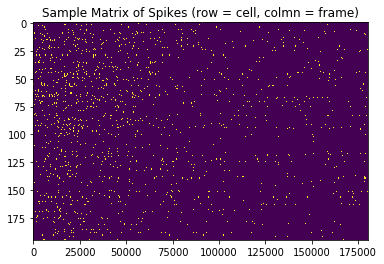

In [19]:
plt.figure()#figsize = (4,4))
plt.imshow(spikes, aspect = 'auto')
plt.title('Sample Matrix of Spikes (row = cell, colmn = frame)')

In [42]:
#CREATE A FUNCTION TAHT PERFORMS SHARC, compare to swap
def do_sharc_shuffle():
    pass

def do_swap_shuffle():
    pass


In [38]:
def create_empty_corr_matrix(raster):
        #INPUT: raster (neuron x frame input)
    og_corrs = np.corrcoef(raster)
    new_corrs = np.zeros(og_corrs.shape)
    return new_corrs
    #activity blocks must contain 1) a begin time 2) a duration and 3) neuron ID
    #each dict can contain all 3 
    #SHARC is an iterative method for generating surrogate datasets.
    
    #SHARC nonrandomly shuffles blocks of activity within a raster to generate a new (surrogate) raster in which the pairwise correlations between neurons match a target correlation matrix

In [39]:
#CREATE NEURAL NETWORK
corrs_test = create_empty_corr_matrix(spikes)

<Figure size 432x288 with 0 Axes>

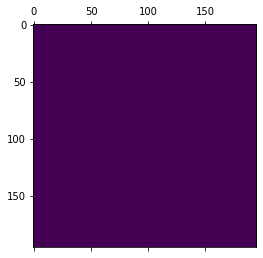

In [40]:
plt.figure()
plt.matshow(corrs_test)

In [ ]:
  #each raster is equivalent to a collection of blocks of activity. Each block of activity is defined by the time at which it begins, its duration, and the neuron which is active.
    activity_blocks = list()
    block_info = {'begin':[], 'duration':[], 'ID':[]}

In [ ]:
 #1,000 units in a hidden layer

In [53]:
#WIP- convert raster into tensor
preprocessing = transforms.Compose([
    transforms.ToTensor()])

In [52]:
BATCH_SIZE = 128 ### Please change this as necessary
NUM_WORKERS = 8  ### Use more workers for more CPU threads

In [51]:
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE, 
    shuffle=True,
    num_workers=NUM_WORKERS)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE, 
    shuffle=False,
    num_workers=NUM_WORKERS)

NameError: name 'train_dataset' is not defined

In [49]:
#build neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(28*28,1000),
                                    nn.ReLU())
    def forward(self, x):
        x = self.encoder(x)
        return x
        

In [47]:
def train(train_loader, model, optimizer, criterion, n_epochs, device, log_interval): 
    model.train() # sets the parameters to be trainable
        
    for batch_idx, (data, target) in enumerate(train_loader): #target is true labels y
        
        data = data.view(-1, 28 * 28) # flatten into 1D array for dense nn
        #data.cuda()
        #target.cuda()
        device ="cuda:0"       
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        
        output = model(data)
        loss = criterion(output, data)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
           
    print('Train Epoch: {}, Loss: {:.6f}'.format(epoch, loss.item()))  
    return loss.item()

In [50]:
### Instantiate your model
model = Net()
device = "cuda:0"
model.to(device) # the .cuda() call puts the model onto the GPU for training

### Define your loss function (training criterion)
### Choose your optimizer

optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = F.mse_loss #use functional mean square error 

# gather all variables 
print("Optimizer is :", optimizer)
print("criterion is ", criterion)
print("Device is", device)
print('model is', model)
log_interval = BATCH_SIZE
print(log_interval, 'log interval')


Optimizer is : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
)
criterion is  <function mse_loss at 0x000002569DC32940>
Device is cuda:0
model is Net(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=1000, bias=True)
    (1): ReLU()
  )
)


NameError: name 'BATCH_SIZE' is not defined